# Circle Detection: Hough Transform

Dai'zjon Carney

Part 1: Applied skimage hough_circle to coins.png to detect coin positions and match their edges. Needed to first run the Canny operator to obtain an edge map. Tried different settings for sigma, low and high threshold. Ultimately, determined the smallest ballpark values of all three parameters that produce a good result (i.e., using 10 is fine if 8 works but 5 doesn't). Specified an appropriate range of radii for hough_circle. Used hough_circle_peaks to extract as many circles as needed to obtain one for each coin. Whether needed or not, specified appropriate minimum distances separating centers for both image dimensions to avoid multiple circles extracted for any one coin. Printed list of (x0,y0,r) values for extracted circle centers and their radii.

Part 2: Added red circle overlay on input image that shows all circles. Used skimage.draw.circle_perimeter. Converted image to RGB before adding circles.

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from skimage import feature
from skimage import transform


from skimage.util import img_as_float32 as img_as_float

# Read coins.png
# Use canny(sigma, low_threshold, high_threshold) to obtain edge map -- consider use of mask to produce clean boundary
I1 = io.imread("coins.png", as_gray=True)
I1 = img_as_float(I1)
#io.imshow(I1) for reference
edges = feature.canny(I1, sigma=0.7, low_threshold=1, high_threshold=1)

## Hough Transform

Coin center: (87, 84), radius: 71
Coin center: (256, 249), radius: 68
Coin center: (253, 81), radius: 69
Coin center: (90, 249), radius: 68


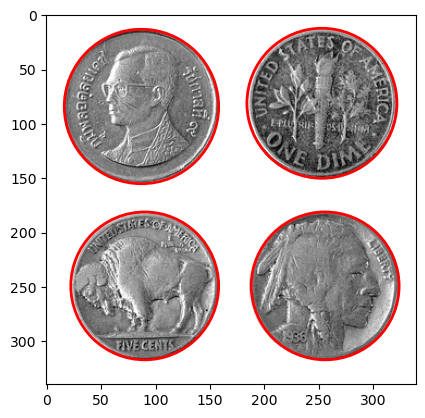

In [2]:
# Specify radii search range
# Apply Hough transform
# Detect peaks from accumulator result
hough_radii = range(60, 90)
hough_res = transform.hough_circle(edges, hough_radii)
accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii, total_num_peaks=4, min_xdistance=40, min_ydistance=40)

# Print (x0,y0,r) for each coin
# For the extracted circle centers and their radii
for center_y, center_x, radius in zip(cy, cx, radii):
    print("Coin center: ({}, {}), radius: {}".format(center_x, center_y, radius))

# Plot the results
fig, ax = plt.subplots()
ax.imshow(I1, cmap=plt.cm.gray)
for center_y, center_x, radius in zip(cy, cx, radii):
    circ = plt.Circle((center_x, center_y), radius, color='red', linewidth=2, fill=False)
    ax.add_patch(circ)
plt.show()